## **Análisis de datos**

En el siguiente notebook se la clasificacion de generos.

Dataset disponible en: https://www.kaggle.com/datasets/elakiricoder/gender-classification-dataset

### **1. Importación de librerias y de los datos**

In [54]:
# importar librerias necesarias
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# herramientas
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
# modelos
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
# escalamiento y normalizacion
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler, LabelEncoder, OneHotEncoder
# imputers
from sklearn.impute import SimpleImputer
# metricas
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import roc_curve, roc_auc_score, auc
# mejoras
from sklearn.model_selection import GridSearchCV

In [2]:
# datos y conversion a dataframe
df = pd.read_csv('gender_classification_v7.csv')
df.columns

Index(['long_hair', 'forehead_width_cm', 'forehead_height_cm', 'nose_wide',
       'nose_long', 'lips_thin', 'distance_nose_to_lip_long', 'gender'],
      dtype='object')

### **2. Limpieza de los datos**

En esta sección se busca realizar una limpieza de los datos, como rellenar datos faltantes, igualar tipos de datos y encontrar datos duplicados. El analisis se lleva a cabo en el dataset de train unicamente.

In [3]:
# dataset
df.head(5)

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long,gender
0,1,11.8,6.1,1,0,1,1,Male
1,0,14.0,5.4,0,0,1,0,Female
2,0,11.8,6.3,1,1,1,1,Male
3,0,14.4,6.1,0,1,1,1,Male
4,1,13.5,5.9,0,0,0,0,Female


In [4]:
# info 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5001 entries, 0 to 5000
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   long_hair                  5001 non-null   int64  
 1   forehead_width_cm          5001 non-null   float64
 2   forehead_height_cm         5001 non-null   float64
 3   nose_wide                  5001 non-null   int64  
 4   nose_long                  5001 non-null   int64  
 5   lips_thin                  5001 non-null   int64  
 6   distance_nose_to_lip_long  5001 non-null   int64  
 7   gender                     5001 non-null   object 
dtypes: float64(2), int64(5), object(1)
memory usage: 312.7+ KB


In [5]:
# estadisticas
print("Estadistica descriptiva del dataset")
df.describe()

Estadistica descriptiva del dataset


,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long
count,5001.000000,5001.000000,5001.000000,5001.000000,5001.000000,5001.000000,5001.000000
mean,0.869626,13.181484,5.946311,0.493901,0.507898,0.493101,0.498900
std,0.336748,1.107128,0.541268,0.500013,0.499988,0.500002,0.500049
min,0.000000,11.400000,5.100000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,12.200000,5.500000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,13.100000,5.900000,0.000000,1.000000,0.000000,0.000000
75%,1.000000,14.000000,6.400000,1.000000,1.000000,1.000000,1.000000
max,1.000000,15.500000,7.100000,1.000000,1.000000,1.000000,1.000000


In [6]:
# tipos de datos
df.dtypes

long_hair                      int64
forehead_width_cm            float64
forehead_height_cm           float64
nose_wide                      int64
nose_long                      int64
lips_thin                      int64
distance_nose_to_lip_long      int64
gender                        object
dtype: object

In [7]:
# duplicados
df.duplicated().sum()

1768

En esta sección se analiza los valores faltantes en las columnas y se buscan métodos para rellenarlos en caso de ser necesario.

In [8]:
# identificacion de datos faltantes con funcion proporcionada en clase
# cantidad de datos completos, sin NA, es decir, el total de datos
qsna=df.shape[0]-df.isnull().sum(axis=0)
# cantidad de datos que si son na
qna=df.isnull().sum(axis=0)
# proporcion de datos con na y sin na
ppna=round(100*(df.isnull().sum(axis=0)/df.shape[0]),2)
# constuir la tab
aux= {'datos sin NAs en q': qsna, 'Na en q': qna ,'Na en %': ppna}
na=pd.DataFrame(data=aux)
# ordenar los valores de la tabla
na.sort_values(by='Na en %',ascending=False)

,datos sin NAs en q,Na en q,Na en %
long_hair,5001,0,0.0
forehead_width_cm,5001,0,0.0
forehead_height_cm,5001,0,0.0
nose_wide,5001,0,0.0
nose_long,5001,0,0.0
lips_thin,5001,0,0.0
distance_nose_to_lip_long,5001,0,0.0
gender,5001,0,0.0


Se verifica la distribucion de los datos.

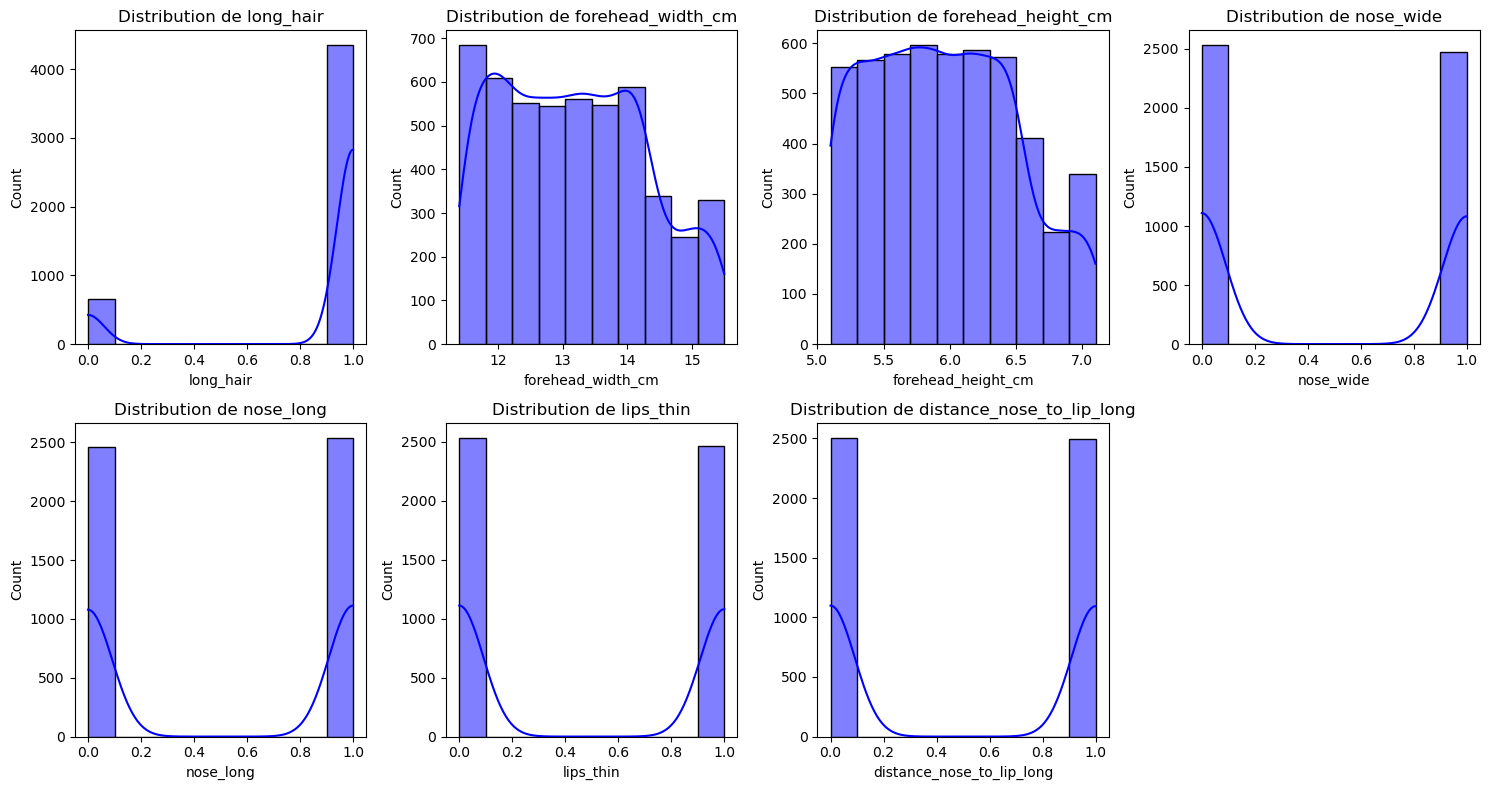

In [9]:
# numericas
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns

# numero de columnas y filas
cols = 4
filas = (len(numerical_columns) // cols) + (len(numerical_columns) % cols > 0)

# distribucion de los datos
plt.figure(figsize=(15, 8))
for i, col in enumerate(numerical_columns, 1):
    # ajusta segun la cantidad de columnas
    plt.subplot(filas, cols, i) 
    sns.histplot(df[col], kde=True, color="blue", bins=10)  
    plt.title(f"Distribution de {col}")
    plt.tight_layout()

plt.show()

Distribucion de los outliers

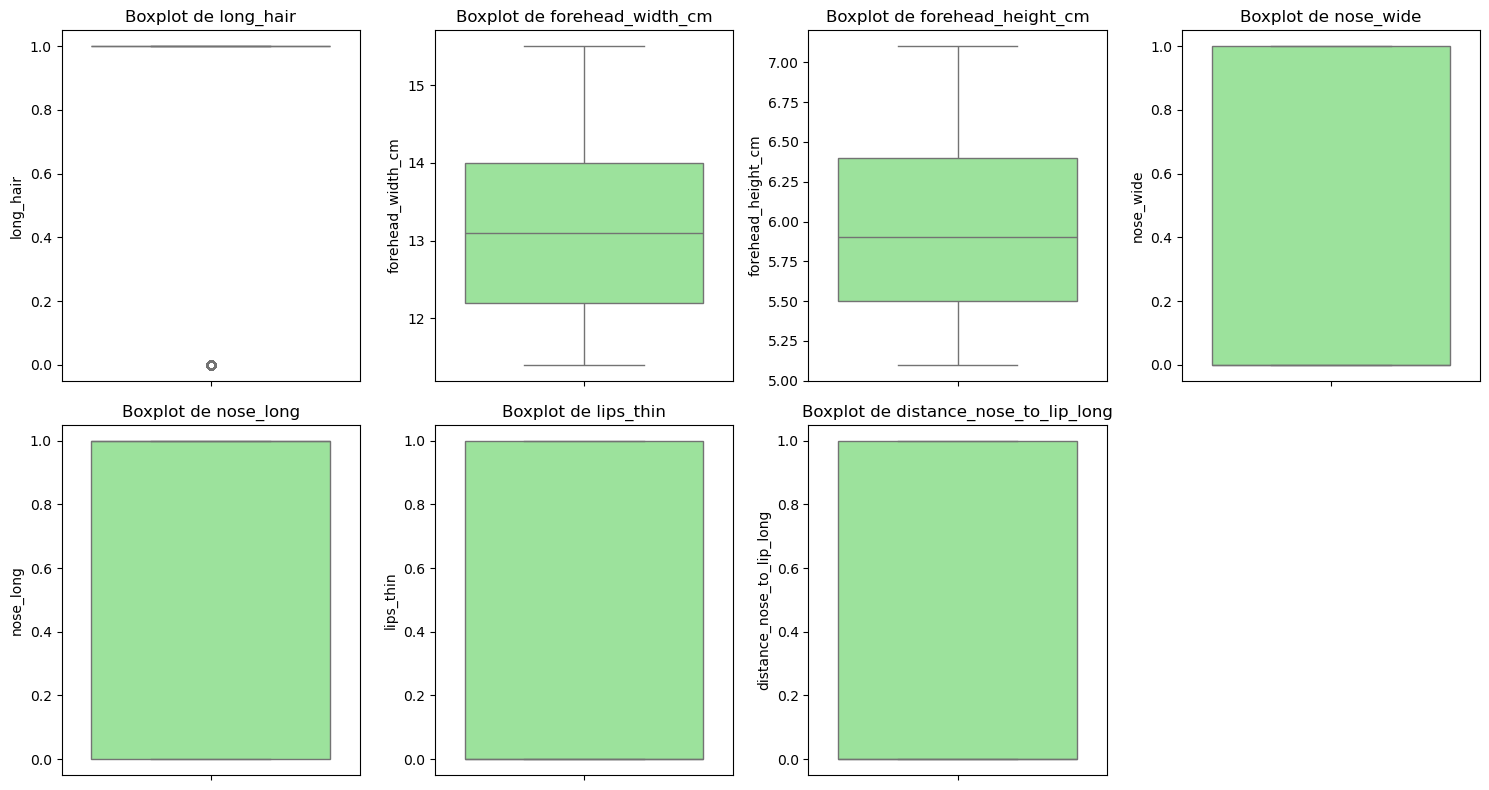

In [10]:
# numericas
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns

# numero de columnas y filas
cols = 4
filas = (len(numerical_columns) // cols) + (len(numerical_columns) % cols > 0)

# crear boxplots 
plt.figure(figsize=(15, 8))
for i, col in enumerate(numerical_columns, 1):
    # ajusta segun la cantidad de columnas
    plt.subplot(filas, cols, i) 
    sns.boxplot(y=df[col], color="lightgreen")
    plt.title(f"Boxplot de {col}")
    plt.tight_layout()

plt.show()

Se visualizan outliers en flight distance. Flight distance tiene una distribucion normal sesgada a la derecha, y con outliers.

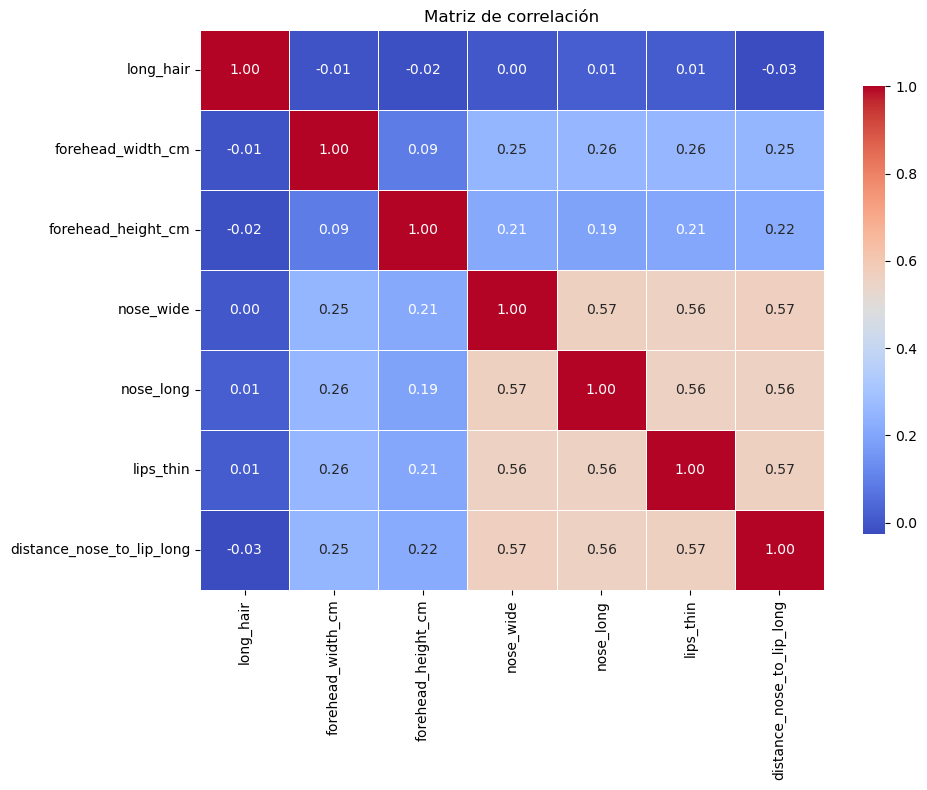

In [12]:
# variables numéricas
numerical_columns = df.select_dtypes(include=['int64','float64'])

# matriz de correlación
correlation_matrix = numerical_columns.corr()

# mapa de calor
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5, linecolor='white', cbar_kws={"shrink": .8})
plt.title('Matriz de correlación')

# mostrar el grafico
plt.tight_layout()
plt.show()

Se observan correlaciones entre las variables.

### **Preprocesamiento de los datos**

El objetivo de aplicar modelos a este set de datos es el de predecir el genero de una persona basada en sus caracteristicas.

Se realiza el preprocesamiento de los datos para luego ser utilizados en modelos.

In [13]:
#df
df.columns

Index(['long_hair', 'forehead_width_cm', 'forehead_height_cm', 'nose_wide',
       'nose_long', 'lips_thin', 'distance_nose_to_lip_long', 'gender'],
      dtype='object')

In [15]:
# df
df.head(5)

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long,gender
0,1,11.8,6.1,1,0,1,1,Male
1,0,14.0,5.4,0,0,1,0,Female
2,0,11.8,6.3,1,1,1,1,Male
3,0,14.4,6.1,0,1,1,1,Male
4,1,13.5,5.9,0,0,0,0,Female


Se eligen como variable target a gender y las demas columnas seran utlilizadas como predictoras.

In [16]:
# variables categoricas y target
x = df.drop(columns=['gender'])
y = df[['gender']]

In [17]:
# split del dataset
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [18]:
# verificacion 
print("Variables predictoras dimensiones en train" , x_train.shape)
print("Variable target dimensiones en train" , y_train.shape)

print("Variables predictoras dimensiones en test" , x_test.shape)
print("Variable target dimensiones en test" , y_test.shape)

Variables predictoras dimensiones en train (3500, 7)
Variable target dimensiones en train (3500, 1)
Variables predictoras dimensiones en test (1501, 7)
Variable target dimensiones en test (1501, 1)


In [21]:
# extraer columnas numericas
numerical_features = x_train.select_dtypes(include=['int64', 'float64']).columns

# verificar
print("Features numericas: ", numerical_features)

Features numericas:  Index(['long_hair', 'forehead_width_cm', 'forehead_height_cm', 'nose_wide',
       'nose_long', 'lips_thin', 'distance_nose_to_lip_long'],
      dtype='object')


In [22]:
# transformadores para cada subconjunto de columnas
# numerico
numeric_transformer = Pipeline(steps=[
    ('imputer',SimpleImputer(strategy='median')),
    ('scaler', MinMaxScaler())
])

In [23]:
# crear columntransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numerical_features)])

### **Modelo de regresion logistica**

Para predecir el genero de la persona, lo cual ahora es una variable binaria, se utiliza la regresion logistica.

In [24]:
# pipeline 
model_rlogistic = Pipeline(steps=[
    ('preprocessor', preprocessor),  
    ('classifier', LogisticRegression())  
])

In [25]:
# ajustar a los datos de entrenamiento
model_rlogistic.fit(x_train, y_train.values.flatten())

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   MinMaxScaler())]),
                                                  Index(['long_hair', 'forehead_width_cm', 'forehead_height_cm', 'nose_wide',
       'nose_long', 'lips_thin', 'distance_nose_to_lip_long'],
      dtype='object'))])),
                ('classifier', LogisticRegression())])

In [26]:
# realizar predicciones
y_pred = model_rlogistic.predict(x_test)

In [27]:
# evaluación del modelo
accuracy = accuracy_score(y_test, y_pred)
print(f'Exactitud: {accuracy}')
print('Informe de Clasificación:')
print(classification_report(y_test, y_pred))

Exactitud: 0.9640239840106596
Informe de Clasificación:
              precision    recall  f1-score   support

      Female       0.96      0.97      0.96       739
        Male       0.97      0.96      0.96       762

    accuracy                           0.96      1501
   macro avg       0.96      0.96      0.96      1501
weighted avg       0.96      0.96      0.96      1501



In [28]:
# matriz de Confusión
conf_matrix = confusion_matrix(y_test, y_pred)
print('Matriz de Confusión:')
print(conf_matrix)

Matriz de Confusión:
[[714  25]
 [ 29 733]]


In [29]:
# funcion para graficar la matriz de confusion
def plot_confusion_matrix(cm, classes, title):
    plt.figure(figsize=(8,6))
    sns.heatmap(cm, annot=True, fmt='d',cmap='Blues', xticklabels=classes, yticklabels=classes)
    plt.title(title)
    plt.ylabel('Etiqueta real')
    plt.xlabel('Etiqueta predicha')
    plt.show()

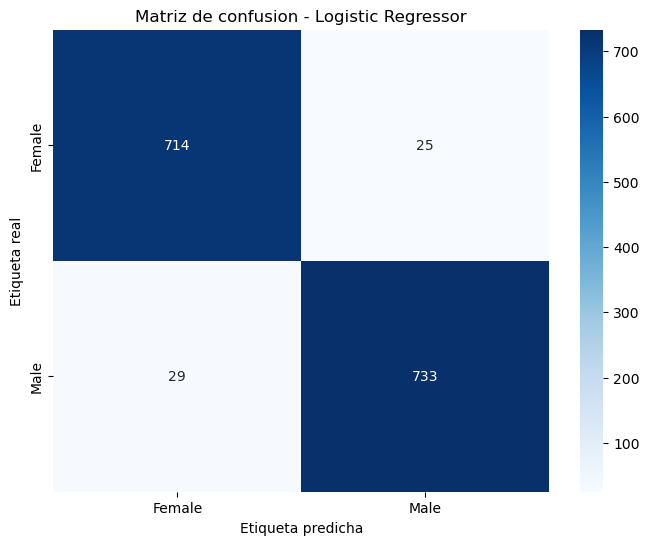

In [30]:
# extraer las clases
classes = np.sort(np.unique(y_test))

# graficar la matriz
plot_confusion_matrix(conf_matrix, classes, title="Matriz de confusion - Logistic Regressor")

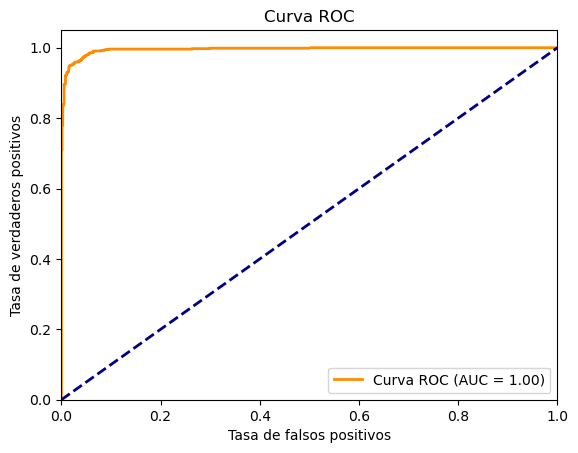

In [35]:
# curva roc 
fpr, tpr, thresholds = roc_curve(y_test, model_rlogistic.predict_proba(x_test)[:, 1], pos_label='Male')
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='Curva ROC (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de falsos positivos')
plt.ylabel('Tasa de verdaderos positivos')
plt.title('Curva ROC')
plt.legend(loc="lower right")
plt.show()

El modelo de regresion logistica realiza muy buenas clasificaciones de genero. Segun la matriz de confusio, solo 29 personas fueron etiquetadas como femeninos cuando en realidad eran masculinos, y el caso inverso se dio con 25 personas.

### **Modelo KNN para clasificacion**

Para predecir el genero de las persona, se utiliza el modelo KNN classifier

In [36]:
# pipeline 
model_knn = Pipeline(steps=[
    ('preprocessor', preprocessor),  
    ('classifier', KNeighborsClassifier(n_neighbors=3))  
])

In [37]:
# ajustar a los datos de entrenamiento
model_knn.fit(x_train, y_train.values.flatten())

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   MinMaxScaler())]),
                                                  Index(['long_hair', 'forehead_width_cm', 'forehead_height_cm', 'nose_wide',
       'nose_long', 'lips_thin', 'distance_nose_to_lip_long'],
      dtype='object'))])),
                ('classifier', KNeighborsClassifier(n_neighbors=3))])

In [38]:
# realizar predicciones
y_pred = model_knn.predict(x_test)

In [39]:
# evaluación del modelo
accuracy = accuracy_score(y_test, y_pred)
print(f'Exactitud: {accuracy}')
print('Informe de Clasificación:')
print(classification_report(y_test, y_pred))

Exactitud: 0.9600266489007329
Informe de Clasificación:
              precision    recall  f1-score   support

      Female       0.95      0.97      0.96       739
        Male       0.97      0.95      0.96       762

    accuracy                           0.96      1501
   macro avg       0.96      0.96      0.96      1501
weighted avg       0.96      0.96      0.96      1501



In [40]:
# matriz de Confusión
conf_matrix = confusion_matrix(y_test, y_pred)
print('Matriz de Confusión:')
print(conf_matrix)

Matriz de Confusión:
[[715  24]
 [ 36 726]]


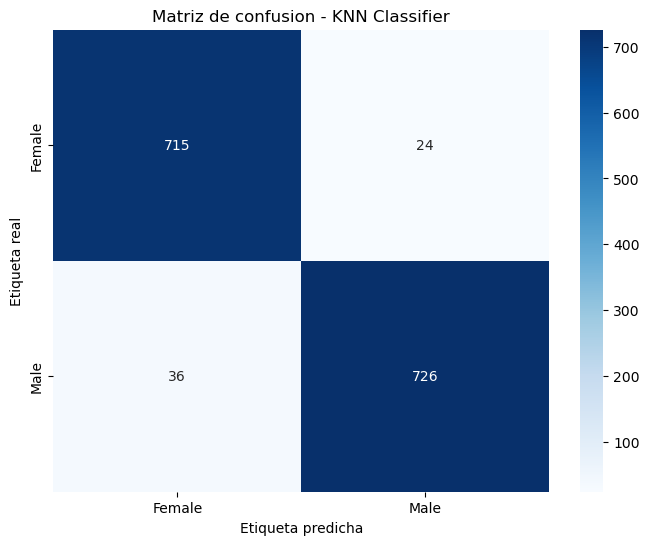

In [41]:
# extraer las clases
classes = np.sort(np.unique(y_test))

# graficar la matriz
plot_confusion_matrix(conf_matrix, classes, title="Matriz de confusion - KNN Classifier")

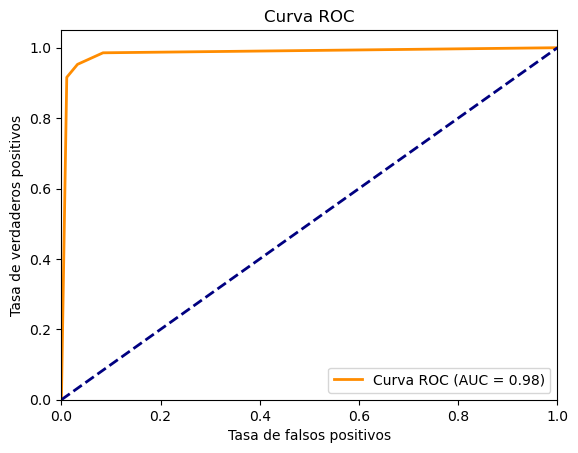

In [42]:
# curva roc 
fpr, tpr, thresholds = roc_curve(y_test, model_knn.predict_proba(x_test)[:, 1], pos_label='Male')
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='Curva ROC (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de falsos positivos')
plt.ylabel('Tasa de verdaderos positivos')
plt.title('Curva ROC')
plt.legend(loc="lower right")
plt.show()

En comparacion a la regresion logistica, el KNN muestra un resultado menos favorable para la clasificacion de los generos.

### **Modelo decission tree classifier**

Para predecir el genero de las persona, se utiliza el modelo decission tree classifier

In [43]:
# pipeline 
model_tree = Pipeline(steps=[
    ('preprocessor', preprocessor),  
    ('classifier', DecisionTreeClassifier(
    random_state=42, 
    max_depth=5,  
    min_samples_split=10,  
    min_samples_leaf=5  
))])

In [ ]:
# ajustar a los datos de entrenamiento
model_tree.fit(x_train, y_train.values.flatten())

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   MinMaxScaler())]),
                                                  Index(['long_hair', 'forehead_width_cm', 'forehead_height_cm', 'nose_wide',
       'nose_long', 'lips_thin', 'distance_nose_to_lip_long'],
      dtype='object'))])),
                ('classifier',
                 DecisionTreeClassifier(max_depth=5, min_samples_leaf=5,
                                        min_samples_split=10,
                                        random_state=42))])

In [45]:
# realizar predicciones
y_pred = model_tree.predict(x_test)

In [50]:
# evaluación del modelo
accuracy = accuracy_score(y_test, y_pred)
print(f'Exactitud: {accuracy}')
print('Informe de Clasificación:')
print(classification_report(y_test, y_pred))

Exactitud: 0.9506995336442372
Informe de Clasificación:
              precision    recall  f1-score   support

      Female       0.93      0.97      0.95       739
        Male       0.97      0.93      0.95       762

    accuracy                           0.95      1501
   macro avg       0.95      0.95      0.95      1501
weighted avg       0.95      0.95      0.95      1501



In [51]:
# matriz de Confusión
conf_matrix = confusion_matrix(y_test, y_pred)
print('Matriz de Confusión:')
print(conf_matrix)

Matriz de Confusión:
[[715  24]
 [ 50 712]]


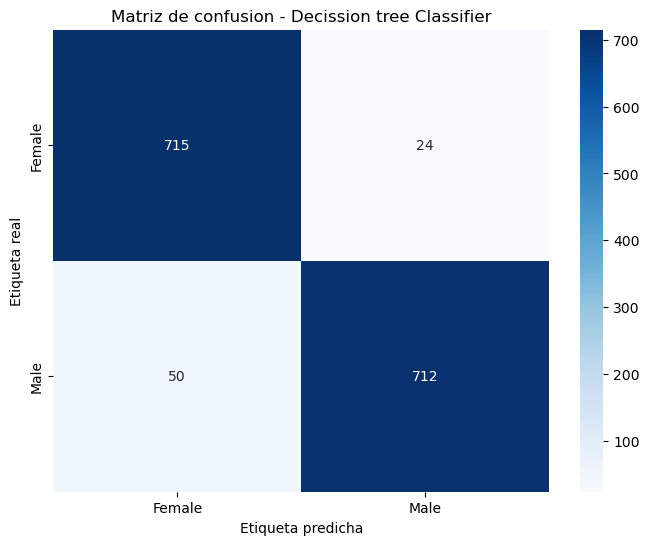

In [52]:
# extraer las clases
classes = np.sort(np.unique(y_test))

# graficar la matriz
plot_confusion_matrix(conf_matrix, classes, title="Matriz de confusion - Decission tree Classifier")

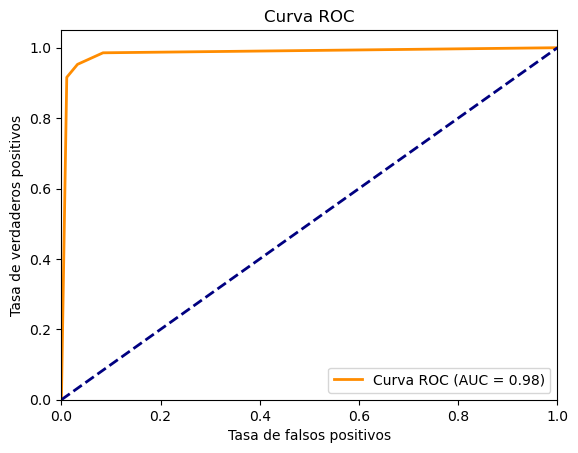

In [ ]:
# curva roc 
fpr, tpr, thresholds = roc_curve(y_test, model_tree.predict_proba(x_test)[:, 1],pos_label='Male')
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='Curva ROC (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de falsos positivos')
plt.ylabel('Tasa de verdaderos positivos')
plt.title('Curva ROC')
plt.legend(loc="lower right")
plt.show()

Aplicando el modelo decission tree classifier, se observa que tiene menor performance que KNN y que regresion logistica. 

### **Modelo random forest classifier**

Se busca predecir el genero de una persona con random forest.

In [55]:
# pipeline 
model_forest = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(n_estimators=100, random_state=42))
])

In [56]:
# ajustar a los datos de entrenamiento
model_forest.fit(x_train, y_train.values.flatten())

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   MinMaxScaler())]),
                                                  Index(['long_hair', 'forehead_width_cm', 'forehead_height_cm', 'nose_wide',
       'nose_long', 'lips_thin', 'distance_nose_to_lip_long'],
      dtype='object'))])),
                ('classifier', RandomForestClassifier(random_state=42))])

In [58]:
# realizar predicciones
y_pred = model_forest.predict(x_test)

In [59]:
# evaluación del modelo
accuracy = accuracy_score(y_test, y_pred)
print(f'Exactitud: {accuracy}')
print('Informe de Clasificación:')
print(classification_report(y_test, y_pred))

Exactitud: 0.9613590939373751
Informe de Clasificación:
              precision    recall  f1-score   support

      Female       0.96      0.96      0.96       739
        Male       0.97      0.96      0.96       762

    accuracy                           0.96      1501
   macro avg       0.96      0.96      0.96      1501
weighted avg       0.96      0.96      0.96      1501



In [60]:
# matriz de Confusión
conf_matrix = confusion_matrix(y_test, y_pred)
print('Matriz de Confusión:')
print(conf_matrix)

Matriz de Confusión:
[[713  26]
 [ 32 730]]


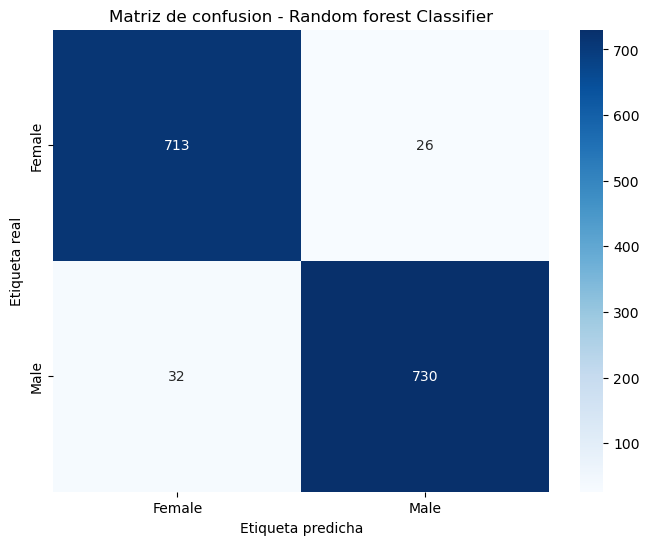

In [61]:
# extraer las clases
classes = np.sort(np.unique(y_test))

# graficar la matriz
plot_confusion_matrix(conf_matrix, classes, title="Matriz de confusion - Random forest Classifier")

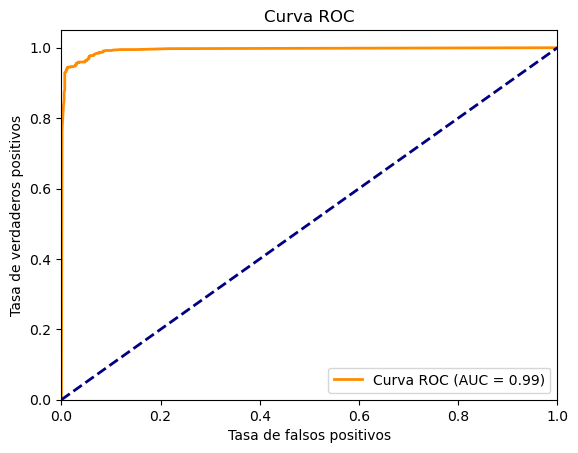

In [62]:
# curva roc 
fpr, tpr, thresholds = roc_curve(y_test, model_forest.predict_proba(x_test)[:, 1],pos_label='Male')
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='Curva ROC (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de falsos positivos')
plt.ylabel('Tasa de verdaderos positivos')
plt.title('Curva ROC')
plt.legend(loc="lower right")
plt.show()

El modelo de random forest se busca mejorar los parametros usando grid search.

In [78]:
# hiperparametros para random forest
param_grid = {
    'classifier__n_estimators': [50, 100, 150],  
    'classifier__max_depth': [5, 10, 15, None],  
    'classifier__min_samples_split': [2, 5, 10], 
    'classifier__min_samples_leaf': [1, 2, 4], 
    'classifier__bootstrap': [True, False] 
}

In [79]:
# gird search 
grid_search = GridSearchCV(estimator=model_forest, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2, scoring='accuracy')

In [80]:
# ajustar el modelo
grid_search.fit(x_train, y_train.values.flatten())

Fitting 5 folds for each of 216 candidates, totalling 1080 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('scaler',
                                                                                          MinMaxScaler())]),
                                                                         Index(['long_hair', 'forehead_width_cm', 'forehead_height_cm', 'nose_wide',
       'nose_long', 'lips_thin', 'distance_nose_to_lip_long'],
      dtype='object'))])),
                                       ('classifier',
                                        RandomForestClassifier(random_state=42))]),
             n_jobs=-1,
             param_grid={'classifier__bootstrap': [True, False],
                         'classifier__max_depth': [5, 10, 15, None],
                         'classifier__min_samples_leaf': [1, 2, 4],
                         'classifier__min_samples_split': [2, 5, 10],
                         'classifier__n_estimators': [50, 100, 150]},
             scoring='accuracy', verbose=2)

In [81]:
# resultados
print("Mejores parámetros:", grid_search.best_params_)

Mejores parámetros: {'classifier__bootstrap': True, 'classifier__max_depth': 15, 'classifier__min_samples_leaf': 1, 'classifier__min_samples_split': 2, 'classifier__n_estimators': 50}


In [82]:
# realizar el predicciones con el mejor modelo
best_model = grid_search.best_estimator_
y_pred_better = best_model.predict(x_test)

In [83]:
# evaluación del modelo
accuracy = accuracy_score(y_test, y_pred_better)
print(f'Exactitud: {accuracy}')
print('Informe de Clasificación:')
print(classification_report(y_test, y_pred_better))

Exactitud: 0.9586942038640907
Informe de Clasificación:
              precision    recall  f1-score   support

      Female       0.96      0.96      0.96       739
        Male       0.96      0.96      0.96       762

    accuracy                           0.96      1501
   macro avg       0.96      0.96      0.96      1501
weighted avg       0.96      0.96      0.96      1501



In [84]:
# matriz de Confusión
conf_matrix = confusion_matrix(y_test, y_pred_better)
print('Matriz de Confusión:')
print(conf_matrix)

Matriz de Confusión:
[[710  29]
 [ 33 729]]


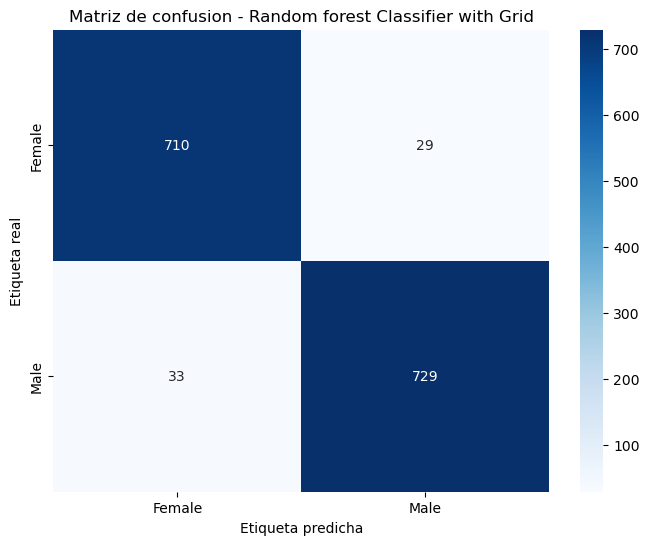

In [85]:
# extraer las clases
classes = np.sort(np.unique(y_test))

# graficar la matriz
plot_confusion_matrix(conf_matrix, classes, title="Matriz de confusion - Random forest Classifier with Grid")

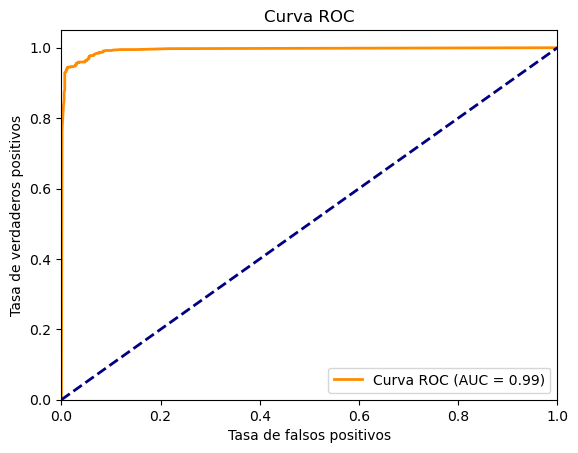

In [86]:
# curva roc 
fpr, tpr, thresholds = roc_curve(y_test, model_forest.predict_proba(x_test)[:, 1],pos_label='Male')
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='Curva ROC (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de falsos positivos')
plt.ylabel('Tasa de verdaderos positivos')
plt.title('Curva ROC')
plt.legend(loc="lower right")
plt.show()